In [149]:
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Load the Titanic dataset using seaborn
df = sns.load_dataset('titanic')

In [150]:
# prompt: identify missing value from dataframe

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [151]:
# Initialize KNNImputer with k=5 (5 nearest neighbors)
knn = KNNImputer(n_neighbors=5,weights='distance')

df['age'] = knn.fit_transform(df['age'].values.reshape(-1, 1).astype(float))

In [152]:
df.drop(columns=['deck','alive'], inplace=True)
df.dropna(inplace=True)

In [153]:
# prompt: apply label encoder on X_train and X_test
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in X_train and X_test
categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone','embark_town']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


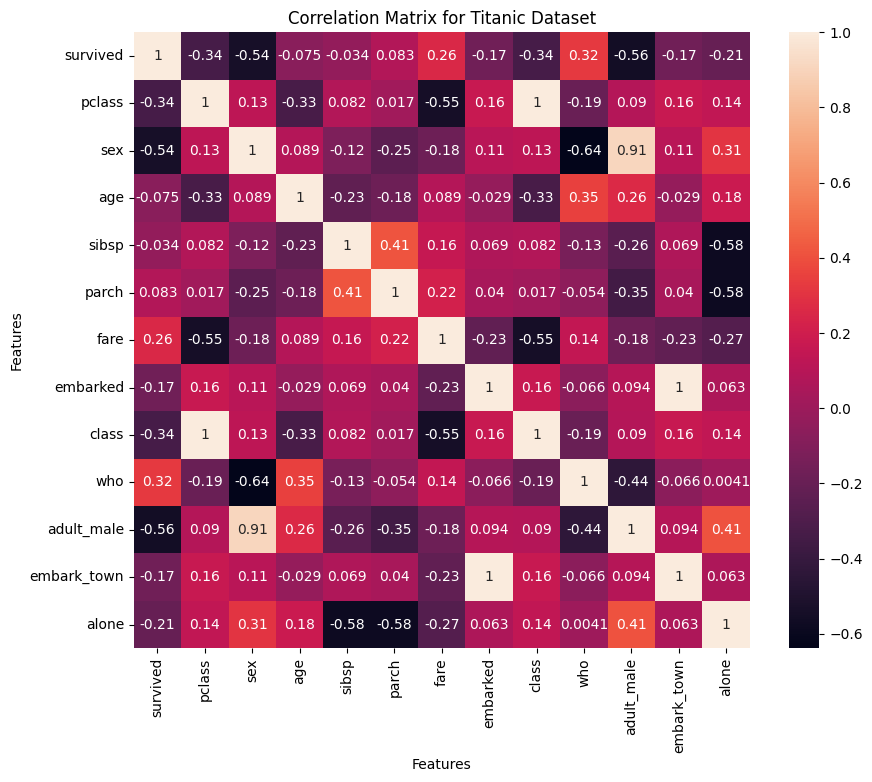

In [154]:
# prompt: plot correlation matrix for df with value on square

# Calculate the correlation matrix
corr = df.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap with the correlation values
sns.heatmap(corr, annot=True, square=True, ax=ax)

# Add a title and labels
ax.set_title("Correlation Matrix for Titanic Dataset")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Show the plot
plt.show()


In [155]:
# prompt: replace outlier with mean value

def replace_outliers_with_mean(df, column_name):

  # Calculate the mean and standard deviation of the column
  mean = df[column_name].mean()
  std = df[column_name].std()

  # Define the outlier threshold
  threshold = 3

  # Identify outlier indices
  outlier_indices = df[((df[column_name] - mean) / std).abs() > threshold].index

  # Replace outliers with the mean
  df.loc[outlier_indices, column_name] = mean

  return df

# Replace outliers in 'age' and 'fare' columns
df = replace_outliers_with_mean(df, 'age')
df = replace_outliers_with_mean(df, 'fare')

# Show the updated DataFrame
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,1


In [156]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis=1),
                                                    df['survived'],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((622, 12), (267, 12))

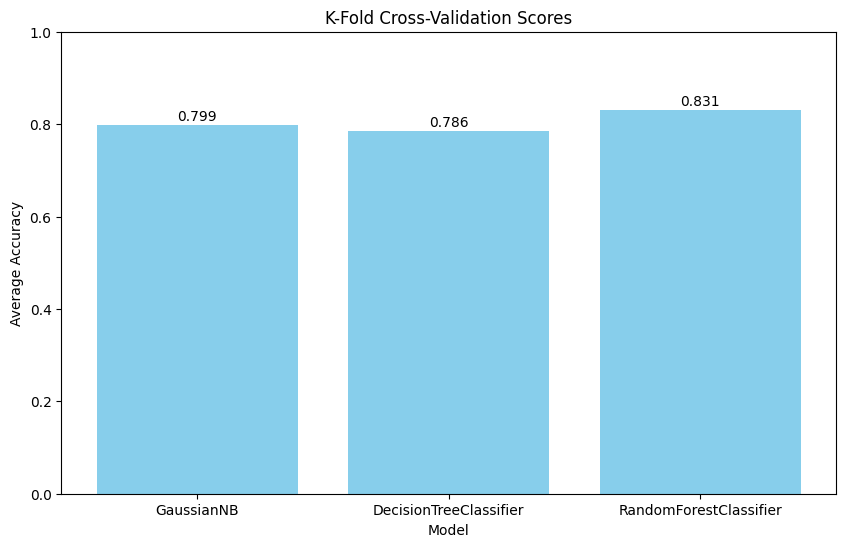

In [157]:

# Define the models
models = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True)

# Lists to store average accuracies and model names
avg_accuracies = []
model_names = []

# Evaluate each model with cross-validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kfold)
    # Calculate the average accuracy
    accuracy = np.mean(scores)
    avg_accuracies.append(accuracy)
    model_names.append(model.__class__.__name__)

# Plot the k-fold cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, avg_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('K-Fold Cross-Validation Scores')
plt.ylim(0.0, 1.0)

# Annotate each bar with its value
for i, accuracy in enumerate(avg_accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.3f}', ha='center')

plt.show()


Model: GaussianNB
Accuracy: 0.787
Precision: 0.793
Recall: 0.787
F1 Score: 0.788


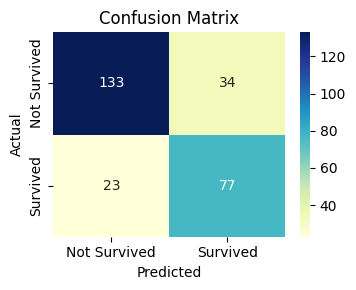

Model: DecisionTreeClassifier
Accuracy: 0.768
Precision: 0.769
Recall: 0.768
F1 Score: 0.768


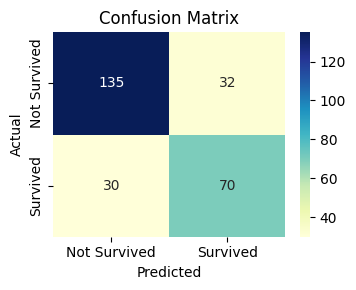

Model: RandomForestClassifier
Accuracy: 0.772
Precision: 0.770
Recall: 0.772
F1 Score: 0.770


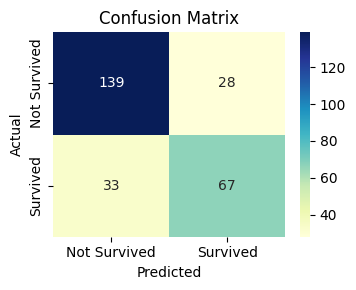

In [158]:
accuracies = []
precisions = []
recalls = []
f1scores = []

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Predict labels for the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and f1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1)

    # Print the evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 3))

    # Plot confusion matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Evaluate each model
for model in models:
    evaluate_model(model, X_test, y_test)


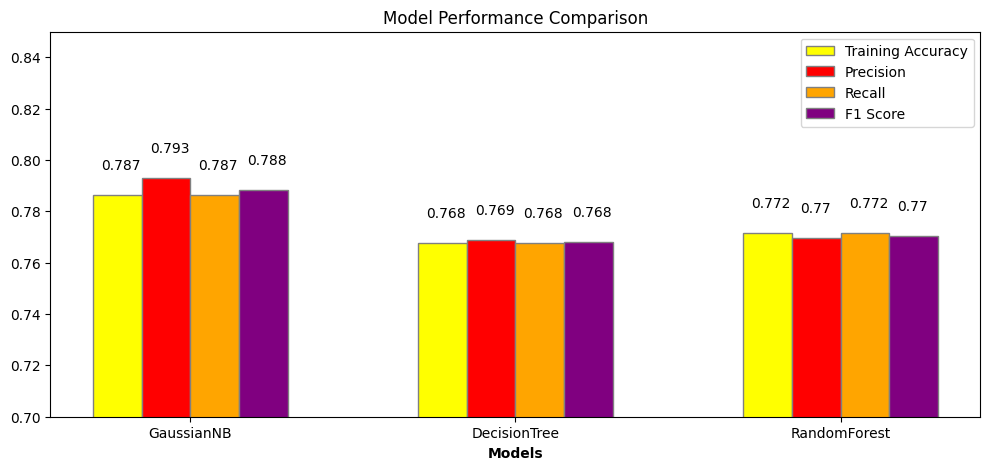

In [159]:
# Model names
models = ['GaussianNB', 'DecisionTree', 'RandomForest']


# Set position of bar on X axis
bar_width = 0.15
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(12, 5))
plt.bar(r1, accuracies, color='yellow', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, precisions, color='r', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='orange', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1scores, color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

# Add values on bars
for i in range(len(models)):
    plt.text(r1[i] - 0.05, accuracies[i] + 0.01, str(round(accuracies[i], 3)), fontsize=10)
    plt.text(r2[i] - 0.05, precisions[i] + 0.01, str(round(precisions[i], 3)), fontsize=10)
    plt.text(r3[i] - 0.05, recalls[i] + 0.01, str(round(recalls[i], 3)), fontsize=10)
    plt.text(r4[i] - 0.05, f1scores[i] + 0.01, str(round(f1scores[i], 3)), fontsize=10)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Add a legend
plt.legend()

plt.ylim(0.70, 0.85)
# Show plot
plt.title('Model Performance Comparison')
plt.show()


In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[2,4,8,10,15,20,30,None],
    'criterion':['entropy','gini'],
    'splitter':['best','random'],
    'min_samples_split':[3,4,5,6,7],
    'min_samples_leaf':[2,3,4]

}
reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
reg.fit(X_train,y_train)
print(reg.best_params_)
print(reg.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'random'}
0.8472774193548387


In [161]:
# prompt: calculate accuracy precision recall f1score on training dataset and store into accuracy_reg  precision_reg recall_reg f1_reg

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = reg.predict(X_test)

# Calculate accuracy, precision, recall, and f1 score
accuracy_reg = accuracy_score(y_test, y_pred)
precision_reg = precision_score(y_test, y_pred, average='weighted')
recall_reg = recall_score(y_test, y_pred, average='weighted')
f1_reg = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy_reg)
print("Precision:", precision_reg)
print("Recall:", recall_reg)
print("F1 Score:", f1_reg)


Accuracy: 0.8052434456928839
Precision: 0.8030639666518546
Recall: 0.8052434456928839
F1 Score: 0.8029490370818607


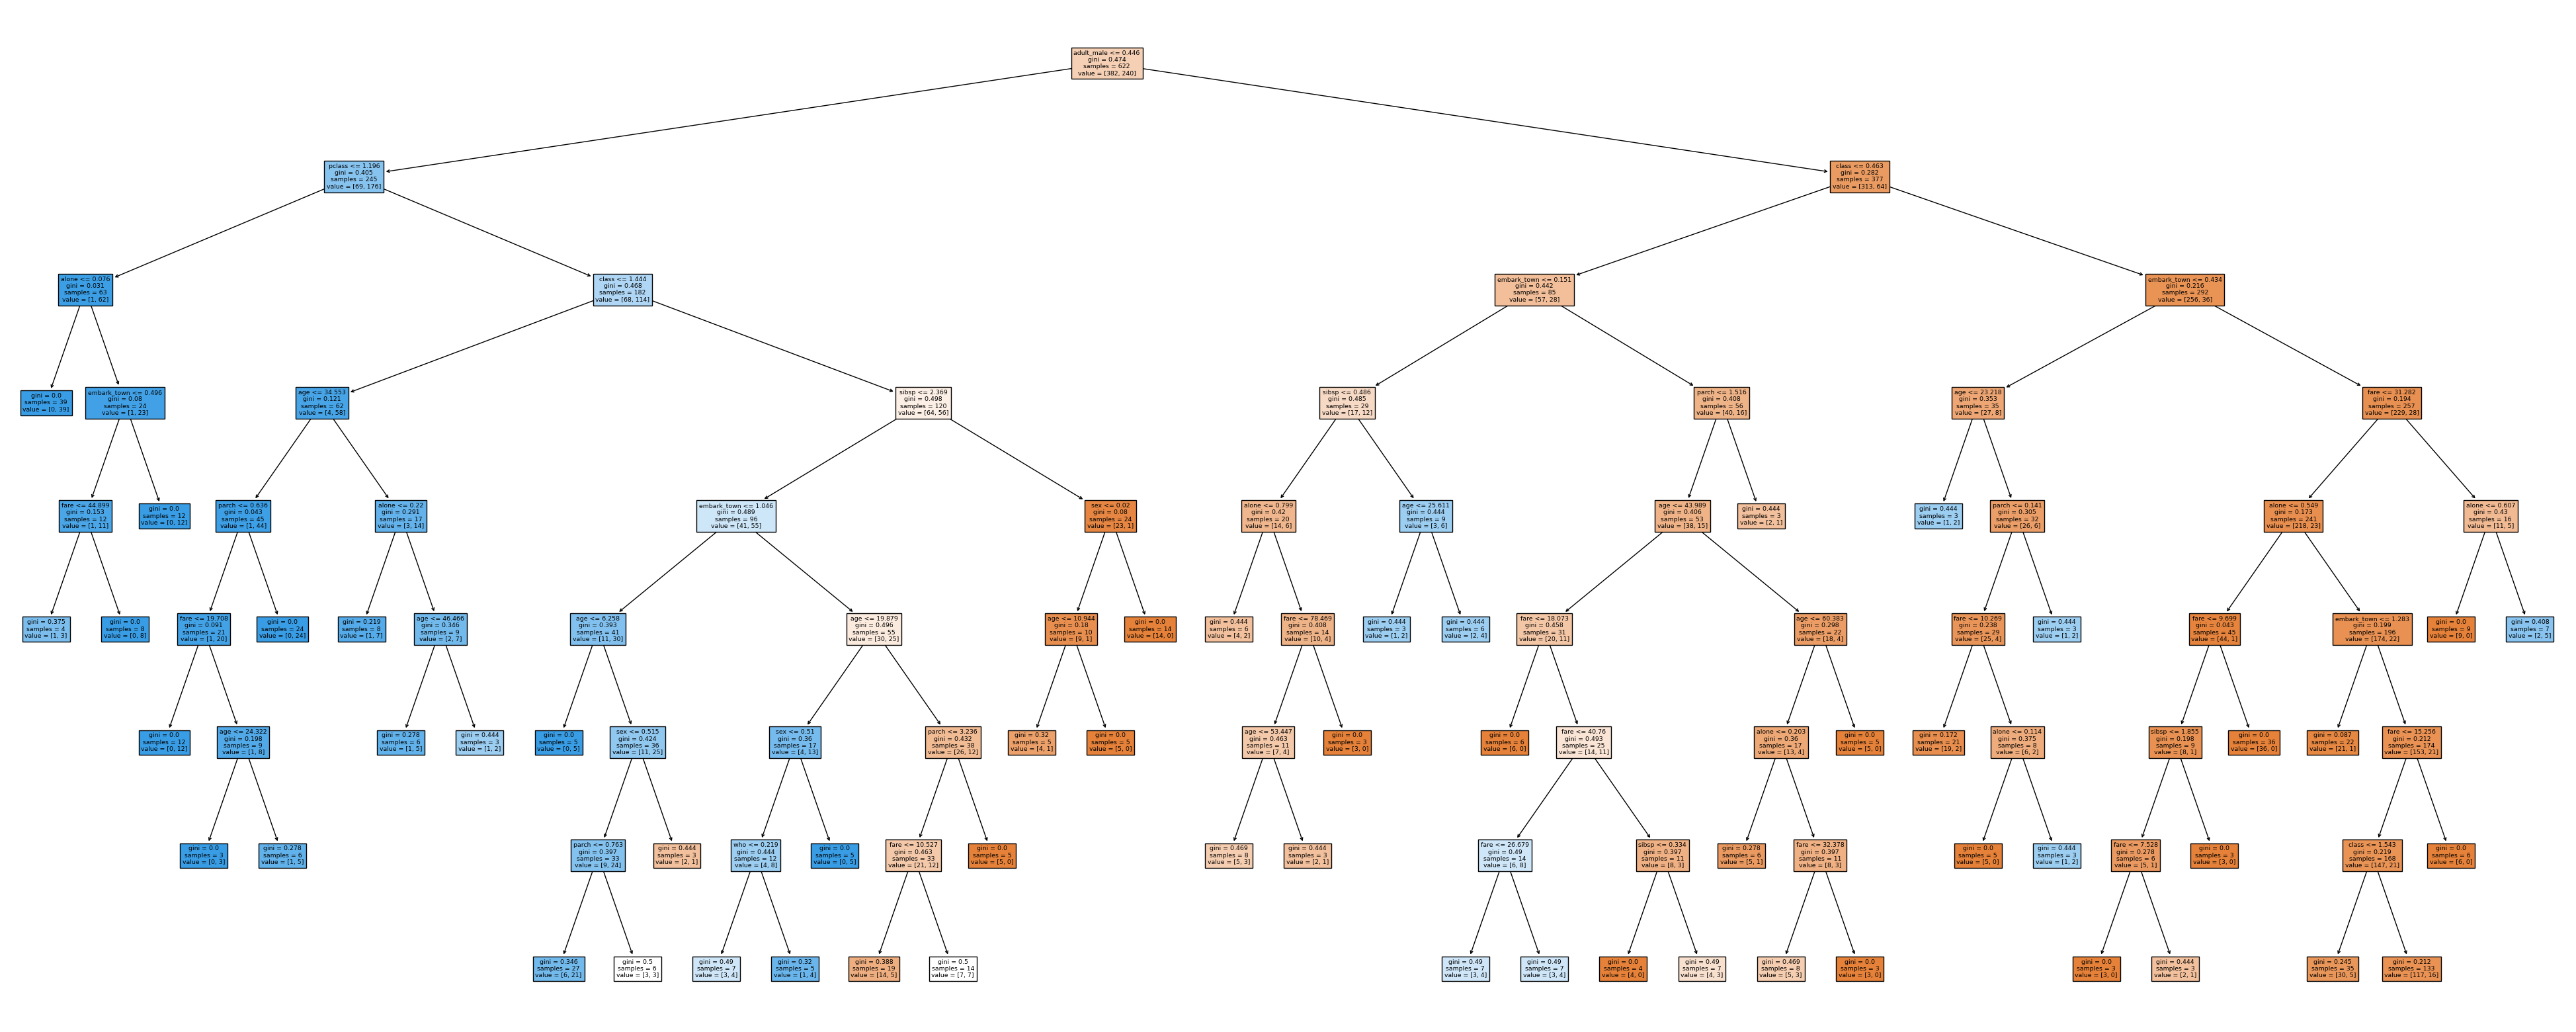

In [162]:
# prompt: plot the tree of reg model

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,20))
tree.plot_tree(reg.best_estimator_,filled="True",feature_names=X_train.columns)
plt.show()


Model: GridSearchCV
Accuracy: 0.805
Precision: 0.803
Recall: 0.805
F1 Score: 0.803


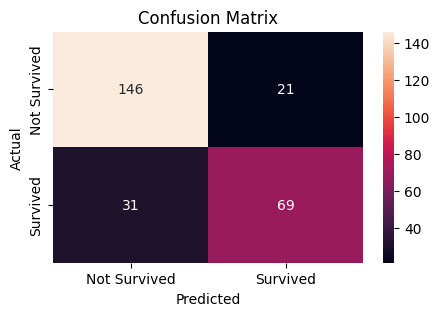

In [163]:
# prompt: plot reg model confusion matrix with f1score precision recall and accuracy

#y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Model: {reg.__class__.__name__}")
print(f"Accuracy: {accuracy_reg:.3f}")
print(f"Precision: {precision_reg:.3f}")
print(f"Recall: {recall_reg:.3f}")
print(f"F1 Score: {f1_reg:.3f}")

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20,60,100,120],
               'criterion': ['gini', 'entropy'],
               'max_features': [0.2,0.6,1.0],
               'max_depth': [2,8,10,14,16,20,None],
              'max_samples':[0.5,0.75,1.0],
             }
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

rf_grid.fit(X_train,y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 60}
0.8601290322580646


In [165]:
# prompt: calculate accuracy precision recall f1score on training dataset and store into accuracy_reg  precision_reg recall_reg f1_reg

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_grid.predict(X_test)

# Calculate accuracy, precision, recall, and f1 score
Accuracy_rf_grid = accuracy_score(y_test, y_pred)
Precision_rf_grid = precision_score(y_test, y_pred, average='weighted')
Recall_rf_grid = recall_score(y_test, y_pred, average='weighted')
F1_rf_grid = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", Accuracy_rf_grid)
print("Precision:", Precision_rf_grid)
print("Recall:", Recall_rf_grid)
print("F1 Score:", F1_rf_grid)



Accuracy: 0.8164794007490637
Precision: 0.8146277826873712
Recall: 0.8164794007490637
F1 Score: 0.8140645449227113


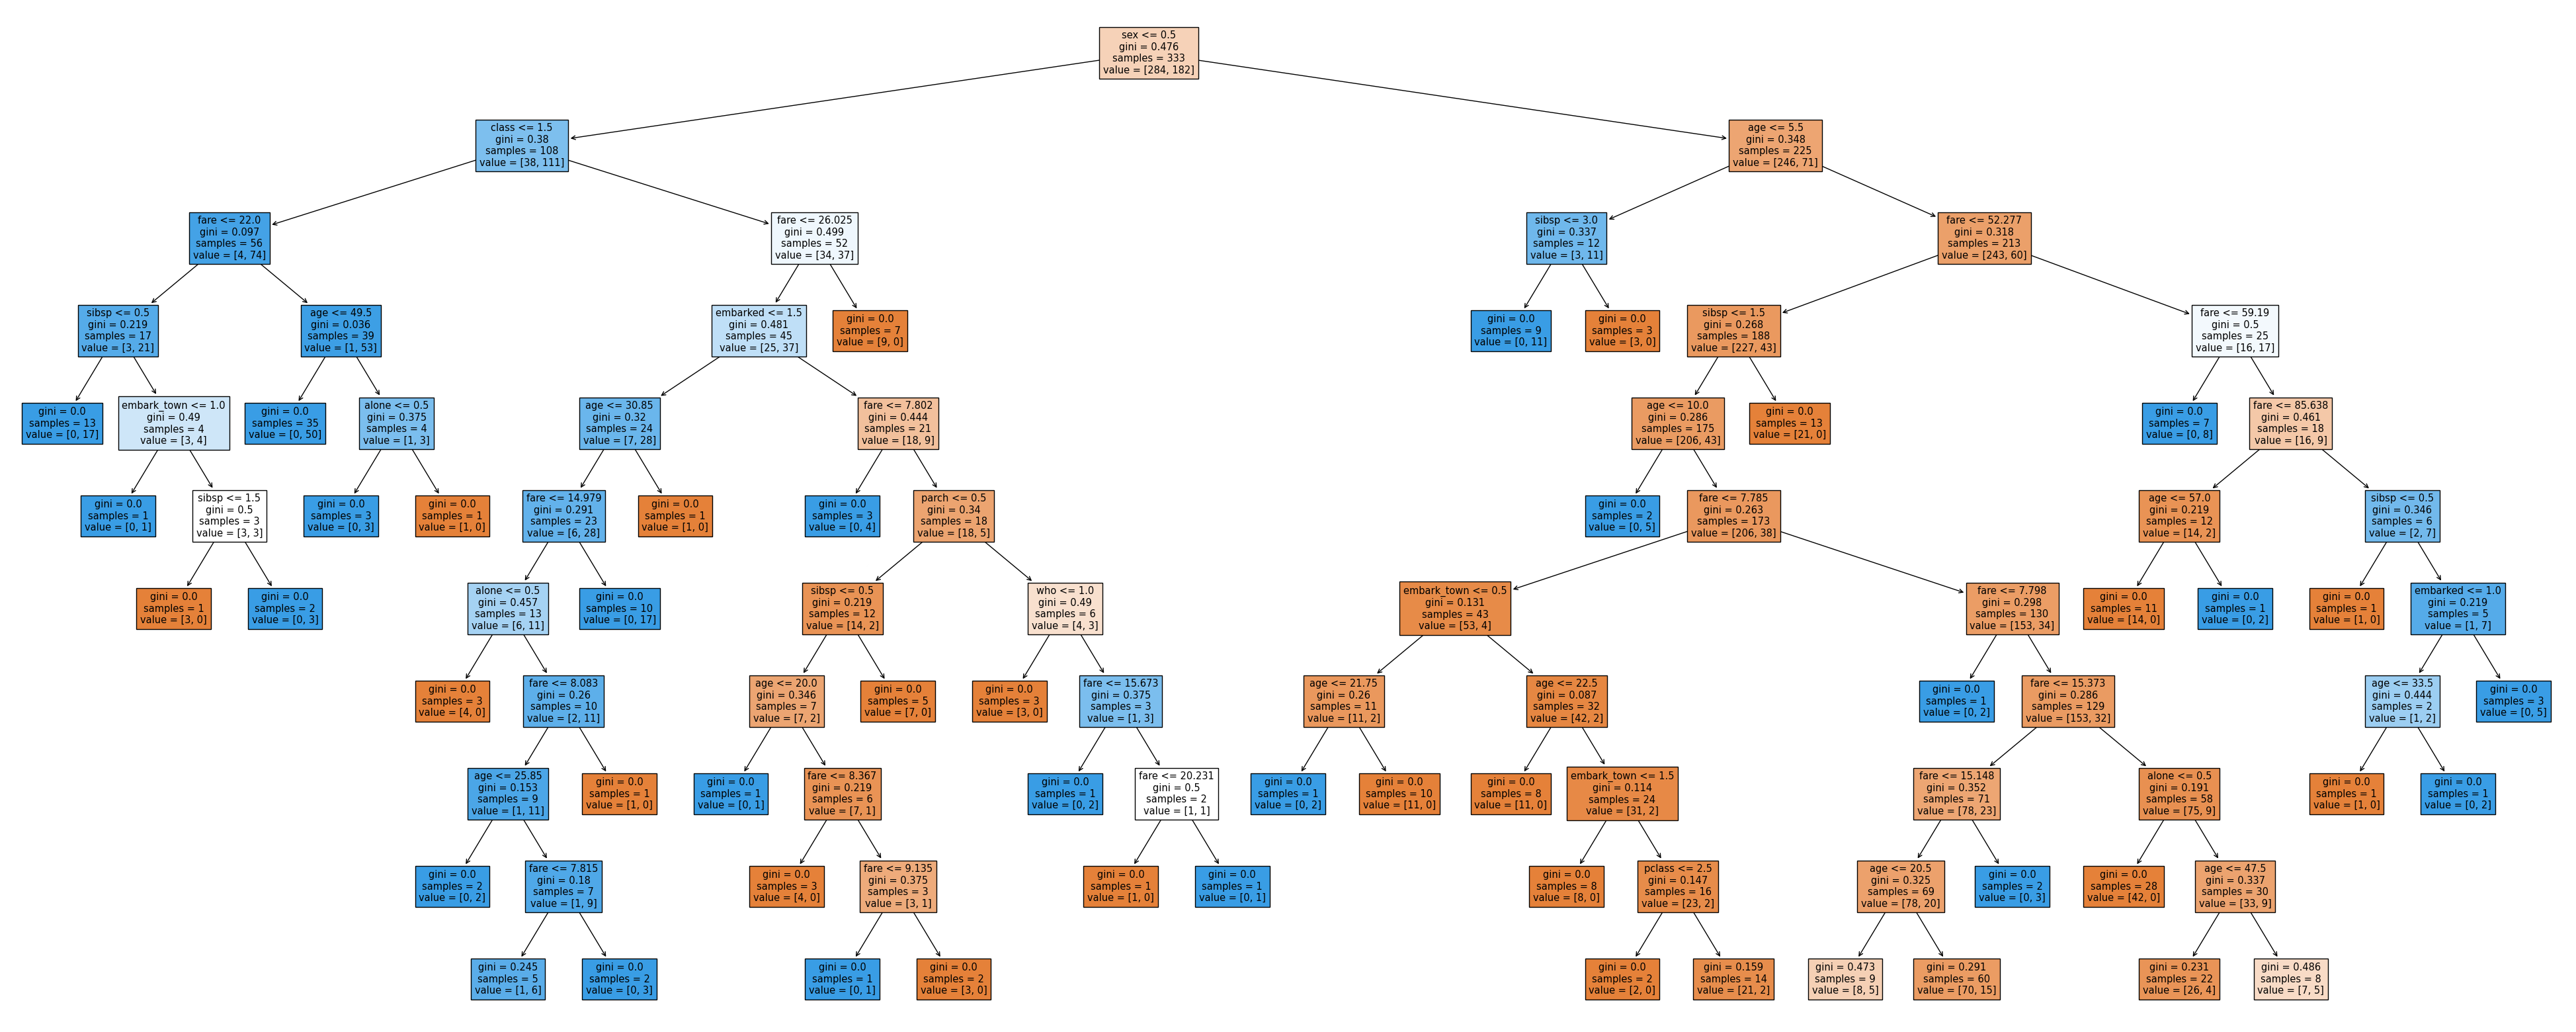

In [166]:
# prompt: plot tree of rf_grid model
plt.figure(figsize=(50,20))
tree.plot_tree(rf_grid.best_estimator_.estimators_[0],filled="True",feature_names=X_train.columns)
plt.show()


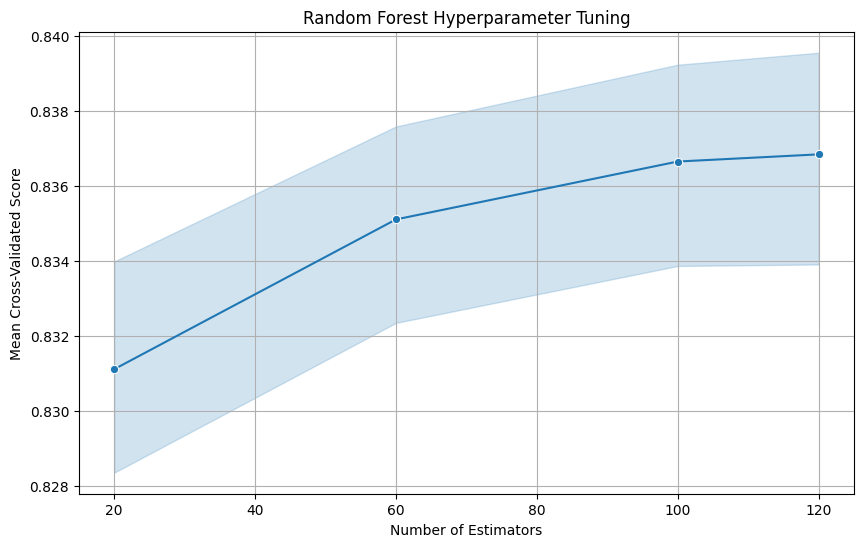

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the results from GridSearchCV
results = rf_grid.cv_results_

# Extract the hyperparameters and their corresponding scores
params = results['params']
mean_scores = results['mean_test_score']

# Create a list of hyperparameter values
n_estimators = [param['n_estimators'] for param in params]

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_estimators, y=mean_scores, marker='o')
plt.title('Random Forest Hyperparameter Tuning')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validated Score')
plt.grid(True)
plt.show()


Model: GridSearchCV
Accuracy: 0.816
Precision: 0.815
Recall: 0.816
F1 Score: 0.814


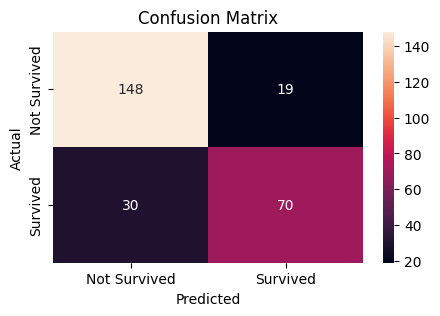

In [168]:
# prompt: plot reg model confusion matrix with f1score precision recall and accuracy

#y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Model: {reg.__class__.__name__}")
print(f"Accuracy: {Accuracy_rf_grid:.3f}")
print(f"Precision: {Precision_rf_grid:.3f}")
print(f"Recall: {Recall_rf_grid:.3f}")
print(f"F1 Score: {F1_rf_grid:.3f}")

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [169]:
# prompt: calculate the reg and rf_grid accuracy , precision , recall , f1 score and store into accuries ,precisions,recall f1scores

# Store the evaluation metrics
accuracies.extend([accuracy_reg, Accuracy_rf_grid])
precisions.extend([precision_reg, Precision_rf_grid])
recalls.extend([recall_reg, Recall_rf_grid])
f1scores.extend([f1_reg, F1_rf_grid])

model_names_tuned = ["Hyper Tuned Decision Tree","Hyper Tuned Random Forest"]
model_names = np.append(model_names,model_names_tuned)

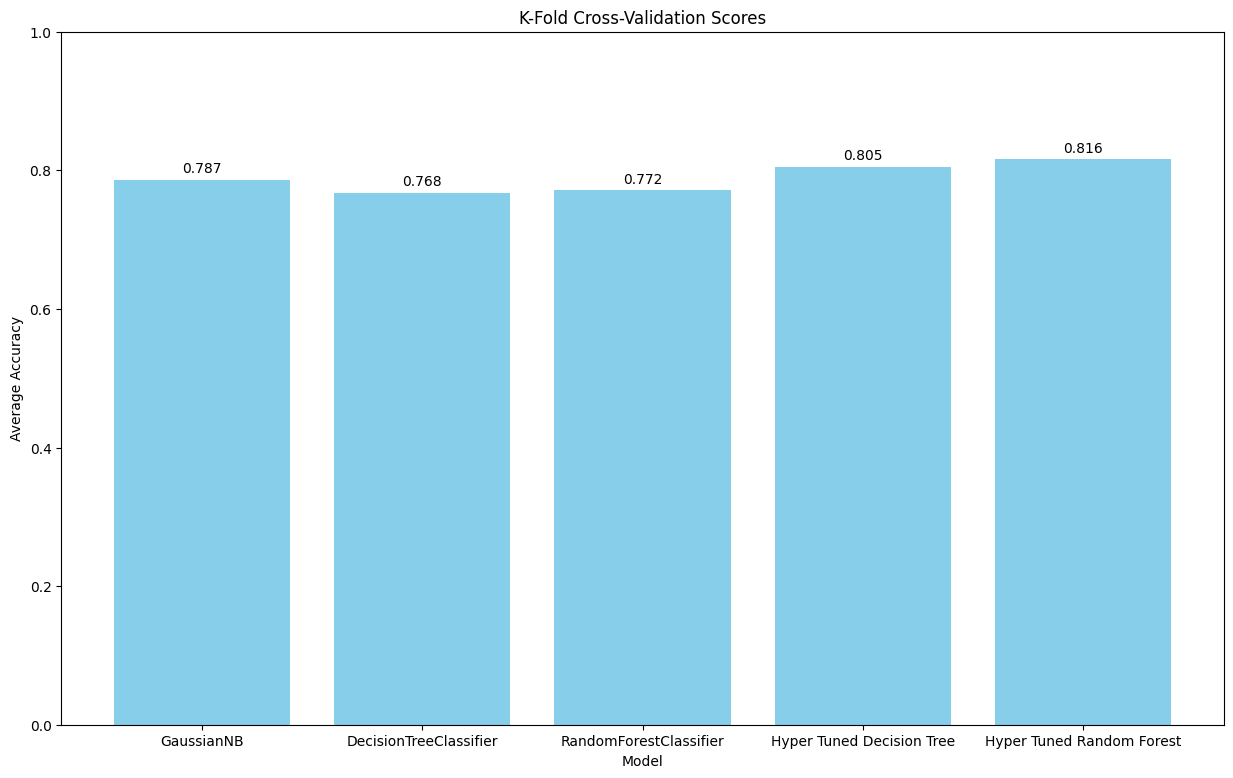

In [174]:
# Lists to store average accuracies and model names

# Plot the k-fold cross-validation scores
plt.figure(figsize=(15, 9))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('K-Fold Cross-Validation Scores')
plt.ylim(0.0, 1.0)

# Annotate each bar with its value
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.3f}', ha='center')

plt.show()

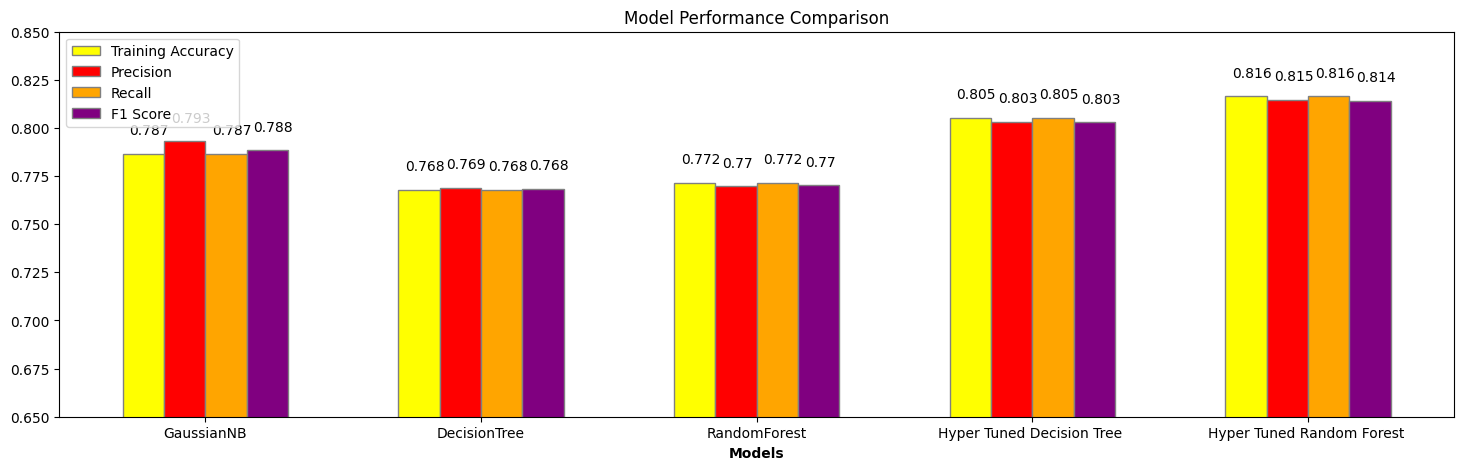

In [175]:
# Model names
models = ['GaussianNB', 'DecisionTree', 'RandomForest','Hyper Tuned Decision Tree ','Hyper Tuned Random Forest ']


# Set position of bar on X axis
bar_width = 0.15
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(18, 5))
plt.bar(r1, accuracies[:len(r1)], color='yellow', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, precisions[:len(r1)], color='r', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recalls[:len(r1)], color='orange', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1scores[:len(r1)], color='purple', width=bar_width, edgecolor='grey', label='F1 Score')

# Add values on bars
for i in range(len(models)):
    plt.text(r1[i] - 0.05, accuracies[i] + 0.01, str(round(accuracies[i], 3)), fontsize=10)
    plt.text(r2[i] - 0.05, precisions[i] + 0.01, str(round(precisions[i], 3)), fontsize=10)
    plt.text(r3[i] - 0.05, recalls[i] + 0.01, str(round(recalls[i], 3)), fontsize=10)
    plt.text(r4[i] - 0.05, f1scores[i] + 0.01, str(round(f1scores[i], 3)), fontsize=10)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Add a legend
plt.legend()

plt.ylim(0.65, 0.85)
# Show plot
plt.title('Model Performance Comparison')
plt.show()


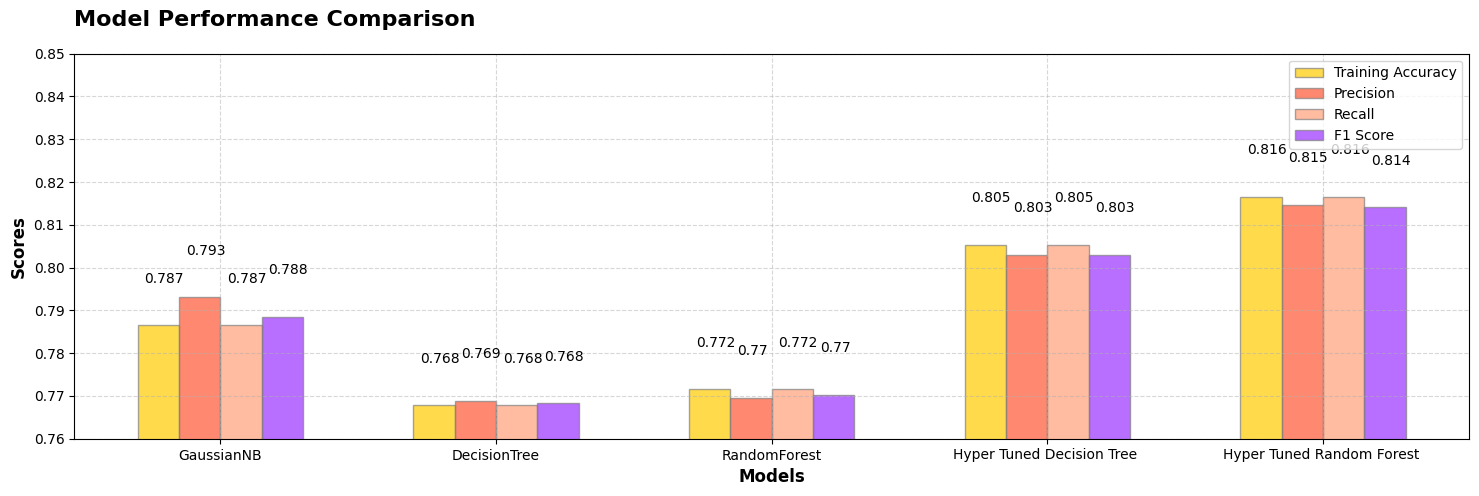

In [201]:
plt.figure(figsize=(18, 5))

# Define colors
colors = ['#FFCC00', '#FF5733', '#FFA07A', '#9B30FF']

# Plotting bars
plt.bar(r1, accuracies[:len(r1)], color=colors[0], width=bar_width, edgecolor='grey', label='Training Accuracy', alpha=0.7)
plt.bar(r2, precisions[:len(r1)], color=colors[1], width=bar_width, edgecolor='grey', label='Precision', alpha=0.7)
plt.bar(r3, recalls[:len(r1)], color=colors[2], width=bar_width, edgecolor='grey', label='Recall', alpha=0.7)
plt.bar(r4, f1scores[:len(r1)], color=colors[3], width=bar_width, edgecolor='grey', label='F1 Score', alpha=0.7)

# Add values on bars
for i in range(len(models)):
    plt.text(r1[i] - 0.05, accuracies[i] + 0.01, str(round(accuracies[i], 3)), fontsize=10)
    plt.text(r2[i] - 0.05, precisions[i] + 0.01, str(round(precisions[i], 3)), fontsize=10)
    plt.text(r3[i] - 0.05, recalls[i] + 0.01, str(round(recalls[i], 3)), fontsize=10)
    plt.text(r4[i] - 0.05, f1scores[i] + 0.01, str(round(f1scores[i], 3)), fontsize=10)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold', fontsize=12, color='black')
plt.ylabel('Scores', fontweight='bold', fontsize=12, color='black')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Add a legend
plt.legend(fontsize=10)

# Set y-axis range
plt.ylim(0.76, 0.85)

# Show plot
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold', color='black', loc='left', pad=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


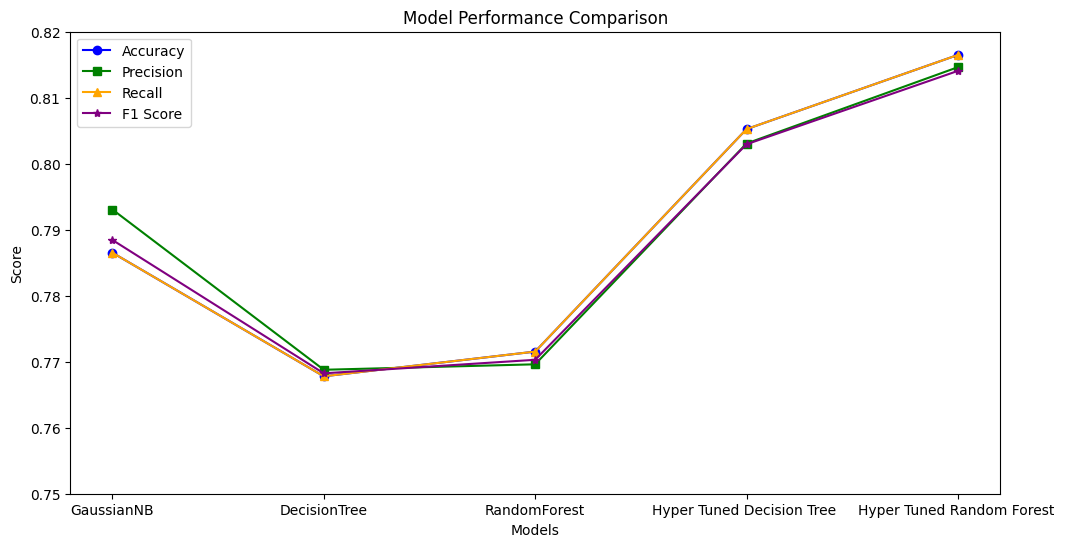

In [182]:
# Create the figure
plt.figure(figsize=(12, 6))

# Plot the lines with different markers and colors
plt.plot(models, accuracies, marker='o', color='b', label="Accuracy")
plt.plot(models, precisions, marker='s', color='g', label="Precision")
plt.plot(models, recalls, marker='^', color='orange', label="Recall")
plt.plot(models, f1scores, marker='*', color='purple', label="F1 Score")

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")

# Add legend
plt.legend()

# Set y-axis range
plt.ylim(0.75, 0.82)

# Show the plot
plt.show()


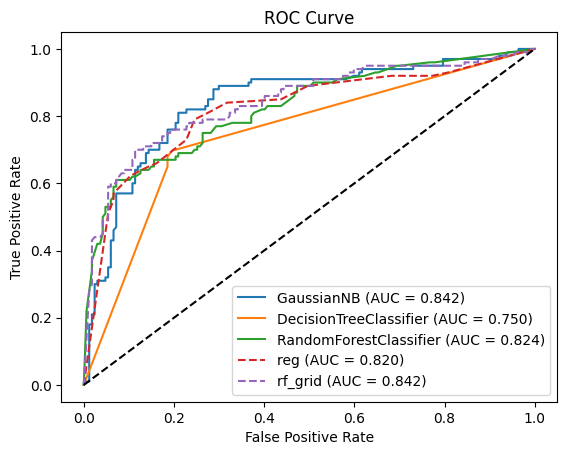

In [176]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
models = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
# Calculate ROC and AUC for each model
for model in models:
    # Predict probability scores for the test set
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {roc_auc:.3f})")

# Calculate ROC and AUC for rf
reg.fit(X_train, y_train)
y_score_rf = reg.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
roc_auc_rf = roc_auc_score(y_test, y_score_rf)

# Calculate ROC and AUC for rf_grid
y_score_rf_grid = rf_grid.predict_proba(X_test)[:, 1]
fpr_rf_grid, tpr_rf_grid, thresholds_rf_grid = roc_curve(y_test, y_score_rf_grid)
roc_auc_rf_grid = roc_auc_score(y_test, y_score_rf_grid)

# Plot ROC curves
plt.plot(fpr_rf, tpr_rf, label=f"reg (AUC = {roc_auc_rf:.3f})", linestyle='--')
plt.plot(fpr_rf_grid, tpr_rf_grid, label=f"rf_grid (AUC = {roc_auc_rf_grid:.3f})", linestyle='--')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--')

# Label axes and show plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
